# Replication Section 3, Song et al. (2024)

- This file replicates the output in Section 3 of 'PyTimeVar: A Python Package for Trending Time-Varying Time Series Models'.
- Authors: Mingxuan Song, Bernhard van der Sluis, Yicong Lin.
- Date current version: September 2024

Section 3 illustrates our package on the Temperature dataset.


### Load temperature data and set seed

In [13]:
# Load data
from PyTimeVar.datasets import temperature
import numpy as np
data = temperature.load(regions=['World'], start_date='1961-01-01', end_date='2023-01-01')
vY = data.values
X = np.ones_like(vY)

# set seed
np.random.seed(123)

### Illustation of local linear regression

In [14]:
from PyTimeVar import LocalLinear
model = LocalLinear(vY, X)
betaHatLLR = model.fit()

No bandwidth or selection method is specified.
-----------------------------------------------------------
Optimal bandwidth selected by individual method:
- AIC method: 0.435484
- GCV method:  0.435484
- LMCV-0 method:  0.0600
- LMCV-2 method:  0.1200
- LMCV-4 method:  0.0600
- LMCV-6 method:  0.0600
-----------------------------------------------------------
Optimal bandwidth used is the avg. of all methods:  0.1952

Note: If a residual-based bootstrap method (LBWB, WB, SB, SWB, AWB) is adopted, the avg. bandwidth  0.1952 is used.
If the MB is implemented, the GCV bandwidth is used.



In [15]:
# print summary
model.summary()

Local Linear Regression Results
Bandwidth:  0.1952
Number of observations: 63
Number of predictors: 1
Beta coefficients (shape: (1, 63)):
Use the 'plot_betas()' method to plot the beta coefficients.
Use the 'confidence_bands()' method to obtain the confidence bands and plots.
You can choose out of 6 types of Bootstrap to construct confidence bands:
SB, WB, SWB, MB, LBWB, AWB
Use the 'plot_residuals()' method to plot the residuals.


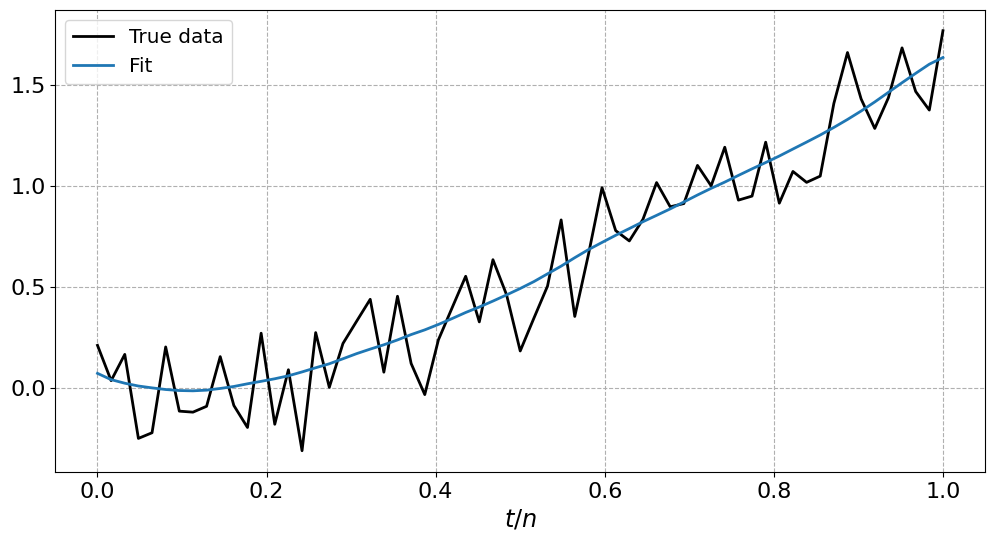

In [16]:
# plot trend and data
model.plot_predicted()

Calculating LBWB Bootstrap Samples


100%|█████████████████████████████████████████████████████████████████████████████| 1299/1299 [00:12<00:00, 106.92it/s]


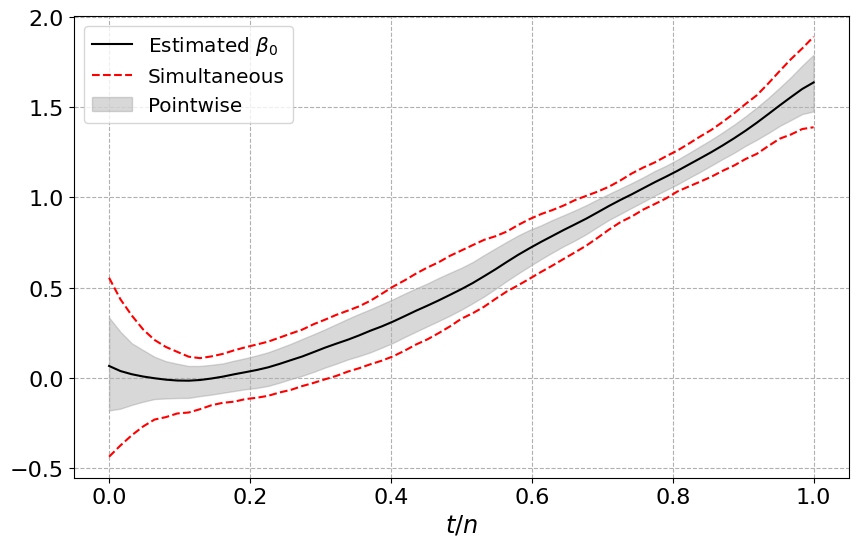

In [17]:
# plot confidence bands using LBWB
S_LB, S_UB, P_LB, P_UB = model.confidence_bands(bootstrap_type='LBWB', Gsubs=None, plots=True)

#### Illustration of parameter specifications for local linear regression

In [18]:
# auxiliary LLR model to illustrate kernel, bandwidth selection, and tau
tau = np.linspace(0, 0.5, len(vY))
model2LLR = LocalLinear(vY, X, kernel='Gaussian', bw_selection='lmcv_8', tau=tau)
beta_hat_model2 = model2LLR.fit()

-----------------------------------------------------------
Optimal bandwidth used is LMCV-8:  0.0750

--------------------------------------------------------
Note: If a residual-based bootstrap method (LBWB, WB, SB, SWB, AWB) is adopted, the LMCV-8 bandwidth  0.0750 is used.
If the MB is implemented, the GCV bandwidth is used.



### Illustation of boosted HP filter

Boosted HP Filter Results:
Stopping Criterion: adf
Max Iterations: 100
Iterations Run: 1
Lambda: 1600
Alpha: 0.05

Information Criteria Values:
[3.54412124e-12]


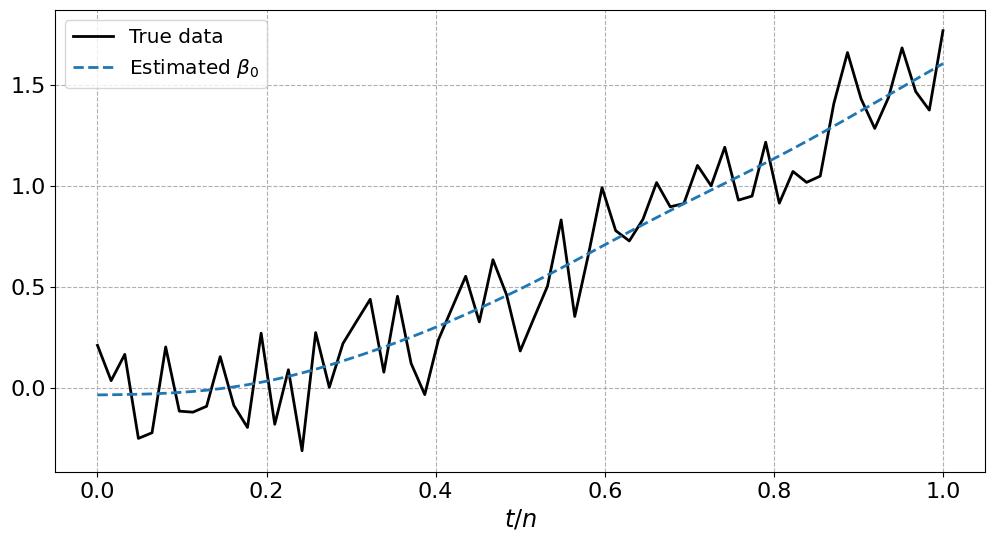

In [19]:
from PyTimeVar import BoostedHP
bHPmodel = BoostedHP(vY, dLambda=1600, iMaxIter=100)
bHPtrend, bHPresiduals = bHPmodel.fit(
    boost=True, stop="adf", dAlpha=0.05, verbose=False)
bHPmodel.summary()
bHPmodel.plot()

### Illustration of power-law model

yhat= 0.001 t^1.848


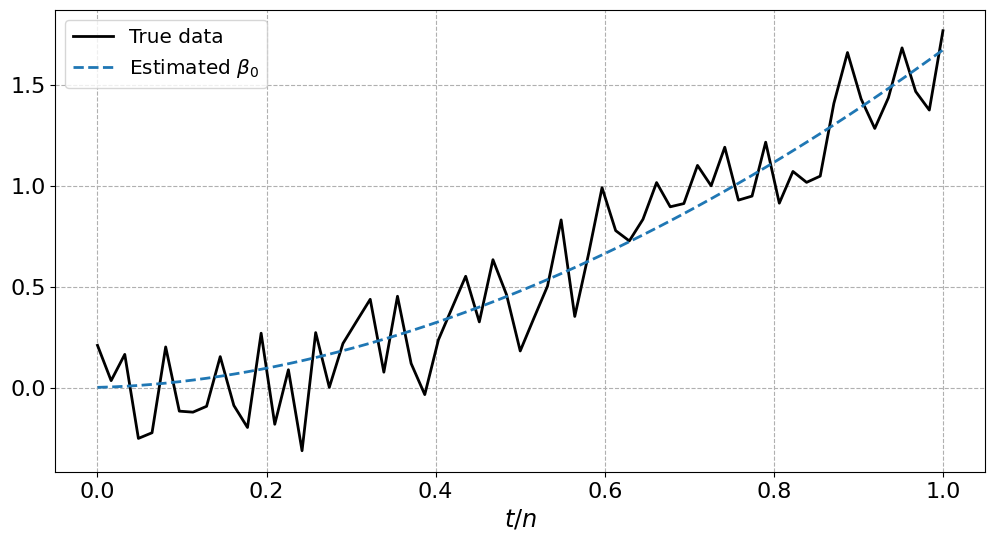

In [20]:
from PyTimeVar import PowerLaw
PwrLaw = PowerLaw(vY, n_powers=1)
pwrTrend, pwrGamma = PwrLaw.fit()
PwrLaw.summary()
PwrLaw.plot()

#### Illustration of parameter specifications for power-law model

In [21]:
# auxiliary power-law model to illustrate options
vgamma0 = np.arange(0, 0.1, 0.1)
options = {'maxiter': 5E5, 'disp': False}
auxPwr = PowerLaw(vY, n_powers=1, vgamma0=vgamma0, options=options)
auxPwrTrend, auxPwrGamma = auxPwr.fit()
auxPwr.summary()

yhat= 0.001 t^1.848


### Illustration of state-space model

C:\Users\bpvan\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Optimization success
Kalman Filter specification:
H: [[[[0.12777861]]]]
Q: [[[[0.03454909]]]]
R: [[1.]]
T: [[1]]


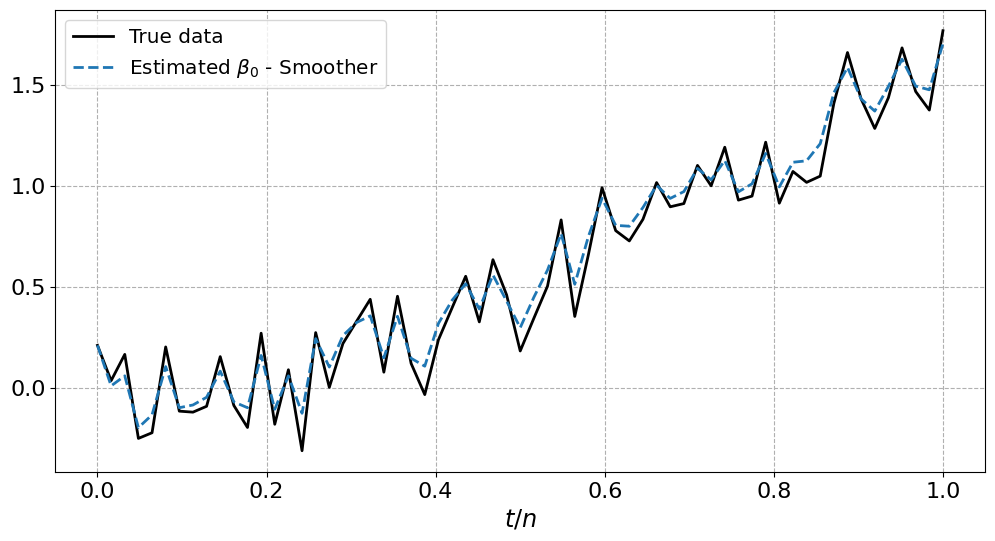

In [22]:
from PyTimeVar import Kalman
kalmanmodel = Kalman(vY=vY)
smooth_trend = kalmanmodel.fit('smoother')
kalmanmodel.summary()
kalmanmodel.plot()

### Illustration of GAS models

Time taken: 0.60 seconds


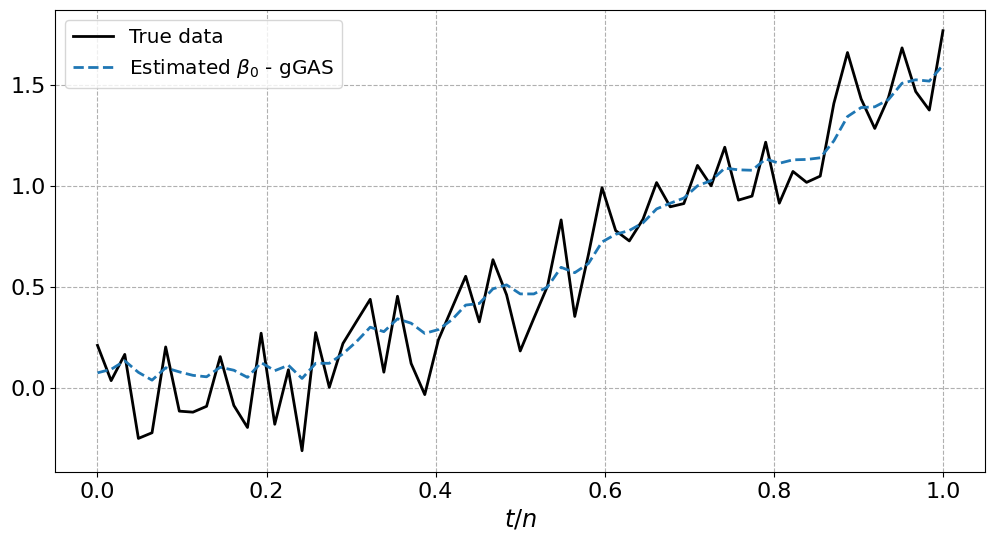

In [23]:
from PyTimeVar import GAS
N_gasmodel = GAS(vY=vY, mX=X, method='gaussian')
N_GAStrend, N_GASparams = N_gasmodel.fit()
N_gasmodel.plot()